## Normal Equations

Simple code example for linear regression using the *Normal Equations*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Firstly, let's define some utility functions.

In [2]:
def load_dataset_with_intercept(csv_path):
    """
    Loads dataset from csv file, and adds x_0 = 1 to each feature input.

    :param csv_path: The csv file path.
    :return:         The feature inputs and the corresponding target values.
    """
    D = np.loadtxt(csv_path, delimiter=',', skiprows=1)
    X, y = D[:, 1:], D[:, 0]
    new_X = np.zeros((X.shape[0], X.shape[1]+1), dtype=X.dtype)
    new_X[:, 0] = 1
    new_X[:, 1:] = X
    return new_X, y


def plot_func(X, y, w):
    # Just making the plot look nicer
    X_1 = X[:, 1]
    x_min = np.min(X_1)
    x_max = np.max(X_1)
    offset = (x_max - x_min) / X_1.shape[0]
    xs = np.linspace(x_min-offset, x_max+offset, 100)

    # Computes the corresponding target values
    intercepts = np.ones_like(xs)
    Xs = np.stack((intercepts, xs), axis=-1)
    ys = Xs @ w

    # Plots the figure
    plt.figure()
    plt.plot(X_1, y, 'go')
    plt.plot(Xs[:, 1:], ys, 'r')

Load and plot the dataset.

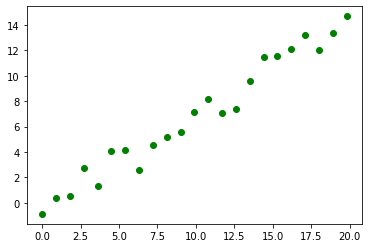

In [3]:
X_train, y_train = load_dataset_with_intercept('data/train.csv')

plt.plot(X_train[:, 1:], y_train, 'go')

### 1. $\boldsymbol{\mathrm{X}}^{\mathrm{T}} \boldsymbol{\mathrm{X}}$ Is Invertible

Suppose we want to fit a straight line to the dataset using the normal equations

\begin{equation*}
    \boldsymbol{\mathrm{w}}^* = (\boldsymbol{\mathrm{X}}^{\mathrm{T}} \boldsymbol{\mathrm{X}})^{-1} \boldsymbol{\mathrm{X}}^{\mathrm{T}} \boldsymbol{\mathrm{y}} .
\end{equation*}

In [4]:
def fit(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

Compute the optimal parameters and plot the function.

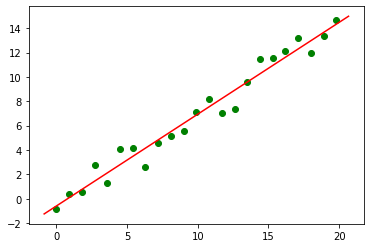

In [5]:
w_star = fit(X_train, y_train)

plot_func(X_train, y_train, w_star)

We can see that the model fits the data quite well.

### 2. $\boldsymbol{\mathrm{X}}^{\mathrm{T}} \boldsymbol{\mathrm{X}}$ Is Non-Invertible

In this case, we can adopt the pseudoinverse of $\boldsymbol{\mathrm{X}}$ and obtain the optimal parameters by

\begin{equation*}
    \boldsymbol{\mathrm{w}}^* = \boldsymbol{\mathrm{X}}^{\dagger} \boldsymbol{\mathrm{y}} .
\end{equation*}

In [6]:
def fit_with_pesudoinverse(X, y):
    """
    Finds the optimal parameters using pseudoinverse.

    :param X: The design matrix with 1's in the 0-th column.
    :param y: The target values.
    :return:  The optimal parameters.
    """
    # SVD of X
    U, Sigma, VT = np.linalg.svd(X)

    d = Sigma.shape[0]
    Sigma_inv = np.zeros_like(X.T)
    Sigma_inv[:d, :d] = np.diag(1/Sigma)

    # Pseudoinverse of X
    pinv = VT.T @ Sigma_inv @ U.T

    return pinv @ y

Compute the optimal parameters using the pseudoinverse and plot the function.

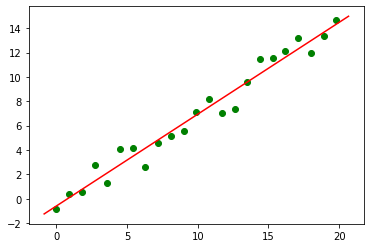

In [7]:
w_star = fit_with_pesudoinverse(X_train, y_train)

plot_func(X_train, y_train, w_star)

This approach gives the same result as previous in this case.